# Исследование рынка недвижимости Санкт-Петербурга с помощью сервиса Яндекс.Недвижимость

## Вступление

### Описание проекта

В моем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.  
Моя задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.  
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

### Библиотеки 

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Описание данных 

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

## Первоначальный просмотр данных


Путь к файлу: /datasets/real_estate_data.csv


In [259]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
#Просмотр данных о таблице
display(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


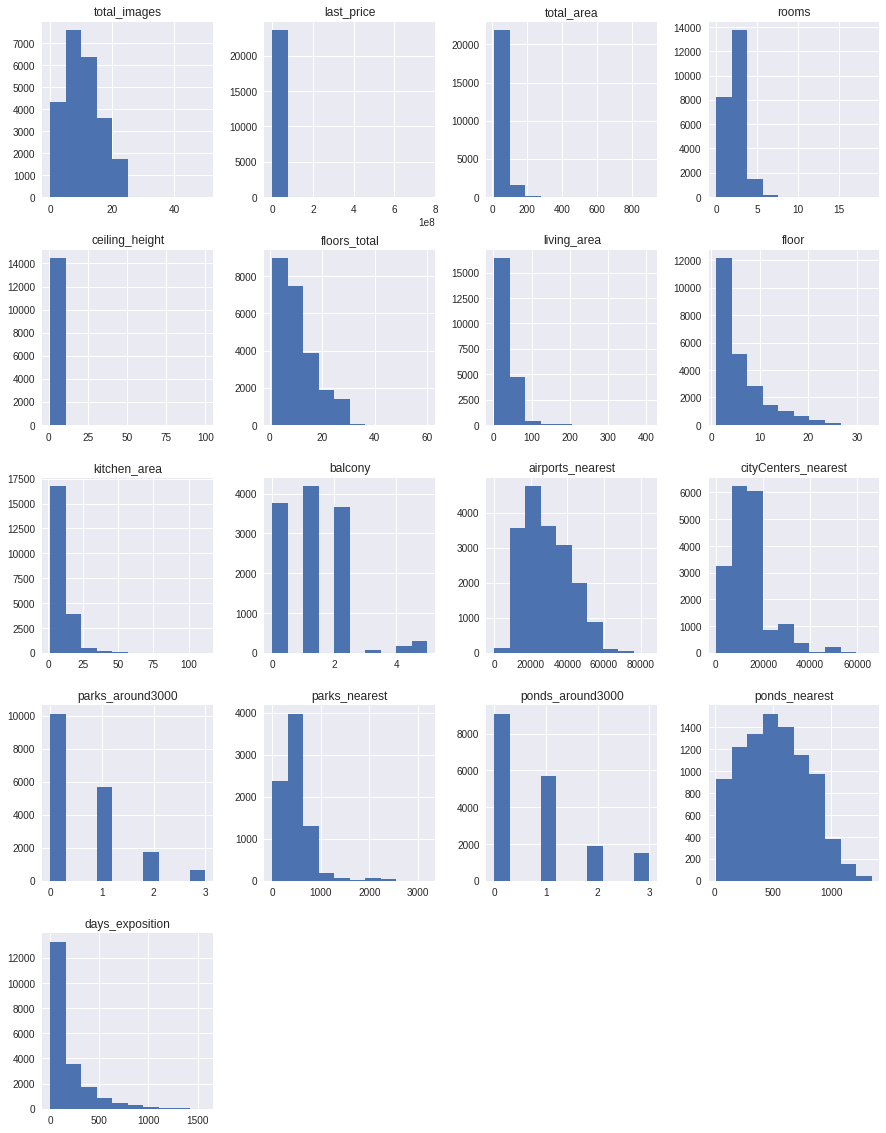

In [260]:
#построение диаграмм
data.hist(figsize=(15,20))
plt.show()

## Предобработка данных

### Просмотр заголовков таблицы на предмет корректности 

In [261]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


Колонки имеют корректные названия.

### Вспомогательная функция для вывода пропущенных значений

In [262]:
# Функция для вывода пропущенных значений в датафрейме, просто вызовите ее, указав нужный датафрейм в параметрах
def missing_values_tab(df):
    #Подсчет количества пропущенных значений
    mis_val = df.isnull().sum()
    #Подсчет доли пропущенных значений в колонке в процентах
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    #Объединяем две созданных колонки в один датафрейм с параметром axis=1, чтобы добавить их справа-слева
    mv_table = pd.concat([mis_val, mis_val_percent], axis=1)  
    #Переименование колонок
    mv_table = mv_table.rename(columns = {0 : 'Пропущенные значения', 1 : '% от всех значений'})
    #Создаем колонку с типом данных 
    mv_table['Тип данных'] = df.dtypes
    mv_table = mv_table[mv_table.iloc[:,1]!=0].sort_values(by='Пропущенные значения',ascending=False)
    print ("Ваш датафрейм содержит " + str(df.shape[1]) + " колонок и " + str(df.shape[0]) + " строк.\n")
    print("Он имеет  " + str(mv_table.shape[0]) +" колонок с пропущенными значениями.")
    #return print(mv_table)
    #Если вы применяете ее не в Jupiter Notebook, можно возвращать значение через print() 
    return display(mv_table)
    
#Вызов функции
missing_values_tab(data)


Ваш датафрейм содержит 22 колонок и 23699 строк.

Он имеет  14 колонок с пропущенными значениями.


,Пропущенные значения,% от всех значений,Тип данных
is_apartment,20924,88.290645,object
parks_nearest,15620,65.909954,float64
ponds_nearest,14589,61.559559,float64
balcony,11519,48.605426,float64
ceiling_height,9195,38.799105,float64
airports_nearest,5542,23.384953,float64
cityCenters_nearest,5519,23.287902,float64
parks_around3000,5518,23.283683,float64
ponds_around3000,5518,23.283683,float64
days_exposition,3181,13.422507,float64


Удаление строк, где все данные пропущены:

In [263]:
data = data.dropna(how='all')

### Заполнение пропусков в колонке 'balcony '

Колонка balcony имеет 48% пропущенных значений.   
Можно предположить, что там где пропуски, то балконов нет и  заполнить их нулем. 

In [264]:
print(data['balcony'].value_counts())
data['balcony'] = data['balcony'].fillna(0)

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


### Заполнение пропусков в колонке 'is_apartment ' 

In [265]:
#Обработка is_apartment
print(data['is_apartment'].value_counts())
data['is_apartment'].fillna(False,inplace=True)
print('Количество пропущенных значений после удаления: ',data['is_apartment'].isna().sum())

False    2725
True       50
Name: is_apartment, dtype: int64
Количество пропущенных значений после удаления:  0


88% от всех записей в колонке 'is_apartment' составляют пропущенные данные. Возможно это связано с тем, что владельцы квартир на продажу не знали, чем отличается квартира от апартаментов, поэтому не заполнили эту колонку.   
Также это может быть связано с тем, что апартаменты относятся к категории нежилой недвижимости, а эта база данных ориентирована прежде всего на собственников квартир. Держа это в уме, можно сделать гипотезу, что пропущенные данные не являются апартаментами и им можно присвоить значение 'False'.  


### Заполнение пропусков в колонках 'parks_nearest','ponds_nearest','parks_around3000','ponds_around3000' 

In [266]:
display(data[['parks_nearest','ponds_nearest','parks_around3000','ponds_around3000']])
display(data[['parks_nearest','ponds_nearest','parks_around3000','ponds_around3000']].describe())

,parks_nearest,ponds_nearest,parks_around3000,ponds_around3000
0,482.0,755.0,1.0,2.0
1,NaN,NaN,0.0,0.0
2,90.0,574.0,1.0,2.0
3,84.0,234.0,2.0,3.0
4,112.0,48.0,2.0,1.0
...,...,...,...,...
23694,796.0,381.0,1.0,3.0
23695,NaN,NaN,NaN,NaN
23696,NaN,NaN,NaN,NaN
23697,173.0,196.0,2.0,3.0


,parks_nearest,ponds_nearest,parks_around3000,ponds_around3000
count,8079.000000,9110.000000,18181.000000,18181.000000
mean,490.804555,517.980900,0.611408,0.770255
std,342.317995,277.720643,0.802074,0.938346
min,1.000000,13.000000,0.000000,0.000000
25%,288.000000,294.000000,0.000000,0.000000
50%,455.000000,502.000000,0.000000,1.000000
75%,612.000000,729.000000,1.000000,1.000000
max,3190.000000,1344.000000,3.000000,3.000000


Бросается в глаза, что там где нули в колонках parks_around3000 и ponds_around3000, стоят NaN в ponds-nearest,parks_nearest.  
Проверим:  

In [267]:
print(data[(data['parks_around3000']==0) & (data['ponds_around3000']==0)]['ponds_around3000'].count())  
print(data[(data['parks_nearest'].isna()) & (data['ponds_nearest'].isna())]['ponds_around3000'].count())

5816
5816


Количество строк совпадает, поэтому можно с уверенностью сказать, что пропуски в колонках parks_nearest и ponds_nearest	скорее всего связаны со сбоями в работе системы или неполадками с интернетом. 
Тоже самое можно сказать про parks_around3000 и ponds_around3000.
Данные оставим как есть, так как заполнить каким-то адекватным числовым значением их не получится, а заполнение нулем может привести к ошибкам в функции корелляции, ежели будем ее применять к этим столбикам.

### Колонки airport_nearest и cityCenters_nearest  

Пропуски в колонках airport_nearest и cityCenters_nearest также скорее всего связаны с тем, что машина их не смогла заполнить, так как не могла обнаружить координаты центра и аэропорта.Или это мог быть какой-то секретный объект. Заполнить их цифровым значением также врядли получится. Поэтому придется оставить как есть, остаточных записей хватит для проведения анализа.

### Заполнение пропусков в колонке 'days_exposition' 

13% всех записей в этой колонке являются пропущенными.
Что касается этой колонки, пропущенные данные могли быть вызваны сбоем базы данных или тем, что записи в нее не еще вносились.
Если предположить, что данные проставляются системой, то пропуски могут также означать. что квартира еще продается.
Проверим, если в колонке нули. чтобы заполнить ее ими.

In [268]:
display(data.query('days_exposition==0'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Так как нулей нет, можно заполнить пропущенные значения ими и будем иметь в виду, что 0 означает, что квартира еще в продаже

In [269]:
data['days_exposition'] = data['days_exposition'].fillna(0)
print(data['days_exposition'].isna().sum())

0


### Заполнение пропусков в колонке 'ceiling_height'

In [270]:
#выведем статистику по колонке ceiling_height
print(data['ceiling_height'].describe())
#Обработка аномалий 
display(data[data['ceiling_height']>5].head(10))

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,False,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,False,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,0.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,False,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,0.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,False,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


Рассматривая нижеприведенную таблицу, можно сделать заключение, что квартиры с высотой потолков 20 и больше метров,
ничем выдающимся не отличаются от своих стандартных собратьев, а также часто они находятся в многоэтажных домах и не на последних этажах(чтобы допустить, что это подобие люксов).Можно предположить, что это опечатка с запятой. 
Поделим высоту таких квартир на 10.

In [271]:
#Поделим высоту таких квартир на 10        
data.loc[data['ceiling_height']>=20,'ceiling_height'] /=10

Так как  центр Петербурга составляют здания, которые являются предметом его гордости и красоты и имеющие свою уникальную планировку, можно предположить, что высота потолков как-то может коррелировать с расстоянием до его исторического центра.
Я буду отталкиваться от информации, предоставленной Google, что протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км. Категоризируем данные по мере удаленности от центра:  
до 3км - центр  
3-5 км - почти центр  
5-8 км - близко  
от 8 до 16 км - далеко  
от 16 - за КАДом

In [272]:
#Создание вспомогательной функции
def assign_range_cat(distance):
    if distance['cityCenters_nearest']<3000:
        return 'центр'
    elif distance['cityCenters_nearest']<5000:
        return 'почти центр'
    elif distance['cityCenters_nearest']<8000:
        return 'близко'
    elif distance['cityCenters_nearest']<16000:
        return 'далеко'
    return 'за КАДом'
#Применяем функцию
data['distance_cat'] = data[data['cityCenters_nearest'].notna()].apply(assign_range_cat,axis=1)
#Выводим проверочную информацию
display(data[['cityCenters_nearest','distance_cat']])
display(data.groupby('distance_cat')['ceiling_height'].mean().sort_values(ascending=False))
#Как видим, средняя высота потолков убывает с расстоянием от центра


,cityCenters_nearest,distance_cat
0,16028.0,за КАДом
1,18603.0,за КАДом
2,13933.0,далеко
3,6800.0,близко
4,8098.0,далеко
...,...,...
23694,4232.0,почти центр
23695,NaN,NaN
23696,NaN,NaN
23697,10364.0,далеко


distance_cat
центр          3.233929
почти центр    3.131013
близко         2.967178
далеко         2.674673
за КАДом       2.648506
Name: ceiling_height, dtype: float64

Так как высота потолков параметр стандартизируемый, то оставшиеся пропуски можно заполнить медианным значением:

In [273]:
unique_range = data['distance_cat'].unique()
for name in unique_range:    
    data['ceiling_height'] = data.groupby('distance_cat')['ceiling_height'].apply(lambda x: x.fillna(x.median()))
                                                       
#Проверка
print(data['ceiling_height'].isna().sum())


5519


Вывод: количество пропусков уменьшилось с 9195 до 5519, с которыми ничего нельзя поделать

### Заполнение пропусков в колонке 'kitchen_area'

In [274]:
#исследование kitchen_area
print(data['kitchen_area'].describe())
print(data['kitchen_area'].value_counts(ascending=False))
#Выводим десять квартир с самой больщой площадью кухни и с самой маленькой
display(data[data['kitchen_area']>30][[
    'total_area','kitchen_area','living_area','rooms','last_price','floor','floors_total']].sort_values(
    by='kitchen_area',ascending=False).head(10))
display(data[data['kitchen_area']<7][[
    'total_area','kitchen_area','living_area','rooms','last_price','floor','floors_total']].sort_values(
    by='kitchen_area').head(10))



count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64


,total_area,kitchen_area,living_area,rooms,last_price,floor,floors_total
19540,900.0,112.0,409.7,12,420000000.0,25,25.0
20215,249.7,107.0,72.0,3,85000000.0,9,10.0
2489,255.0,100.7,153.9,3,12500000.0,2,2.0
5358,590.0,100.0,409.0,15,65000000.0,3,6.0
16239,181.1,93.2,58.2,3,82400000.0,4,9.0
16797,146.0,93.0,40.0,2,65850000.0,3,9.0
10867,177.9,87.2,87.2,3,56844500.0,5,6.0
4394,174.0,77.0,95.0,3,57000000.0,6,10.0
492,216.0,77.0,86.0,4,95000000.0,4,5.0
14644,150.0,75.0,58.0,4,47000000.0,5,6.0


,total_area,kitchen_area,living_area,rooms,last_price,floor,floors_total
20217,28.50,1.3,19.5,1,4250000.0,10,14.0
19642,14.00,2.0,11.0,1,1190000.0,1,5.0
21419,20.00,2.0,14.0,1,1870000.0,1,5.0
906,27.00,2.0,18.0,1,2600000.0,18,23.0
6262,24.00,2.0,16.0,2,3100000.0,5,5.0
11033,32.00,2.0,16.0,1,5350000.0,10,14.0
9138,23.29,2.0,21.0,1,2920000.0,1,3.0
16367,25.70,2.0,22.6,1,2720000.0,11,19.0
17834,34.70,2.3,15.5,1,2940000.0,14,26.0
8729,18.40,2.4,14.0,1,2200000.0,3,3.0


Из вышеприведенных таблиц можно заключить:  
- Максимальное значение площади кухни, равное 112м2, является отклонением, но не опечаткой, так как это пентхаус на последнем  этаже, общей площадью 900м2 из 12 комнат и ценой в почти полмиллиарда рублей.  
- Остальные значения из верхней таблицы также не вызывают подозрений.   
- Рассмотр минимальных значений также не вызвал подозрений в опечатках.  
- Крайние значения не сильно отодвинули медиану от среднего и для заполнения пропущенных значений можно использовать последнее.  
Для заполнения пропущенных значений нам придется рассчитать среднее отношение кухонной площади к общей площади в зависимости от количества комнат, так как скорее всего у них будут разные коэффициенты.  


In [275]:
#Создание уникального списка количества комнат и сортировка по возрастанию
rooms_unique = data['rooms'].unique()
rooms_unique.sort()
print('Число комнат | Коэффициент,%')
for room in rooms_unique:    
    #делаем срез по базе данных т сохраняем его во временный датафрейм
    data_tmp = data.query('rooms == @room and total_area > 0 and kitchen_area > 0 and total_area>kitchen_area')
    #расчет коэффициента и 
    data_tmp['kitchen_coeff'] = data_tmp['kitchen_area']/data_tmp['total_area']        
    #Расчет среднего коэффициента и помещение его в новую колонку 'avg_kitchen_coeff' 
    data.loc[data['rooms']==room,'avg_kitchen_coeff'] = data_tmp['kitchen_coeff'].mean()
    print('     {:<10}'.format(room), '{:.2%}'.format(data_tmp['kitchen_coeff'].mean()))
print('_ '*50)
print('Количество пропущенных значений до заполнения:', data['kitchen_area'].isna().sum())
display(data[data['kitchen_area'].isna()][['total_area','kitchen_area','rooms','avg_kitchen_coeff']].head(10))
#заполнение пропусков средним значением для каждого типа квартир (по количеству комнат)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*data['avg_kitchen_coeff'])


Число комнат | Коэффициент,%
     0          nan%
     1          24.99%
     2          17.42%
     3          14.09%
     4          12.40%
     5          11.35%
     6          10.41%
     7          9.19%
     8          9.17%
     9          7.51%
     10         8.80%
     11         6.69%
     12         12.44%
     14         7.56%
     15         16.95%
     16         4.81%
     19         7.37%
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Количество пропущенных значений до заполнения: 2278


,total_area,kitchen_area,rooms,avg_kitchen_coeff
3,159.0,NaN,3,0.140928
30,32.8,NaN,1,0.249906
37,45.8,NaN,2,0.174163
44,40.0,NaN,1,0.249906
59,46.5,NaN,1,0.249906
60,35.0,NaN,1,0.249906
81,68.0,NaN,1,0.249906
82,80.5,NaN,3,0.140928
133,31.0,NaN,1,0.249906
144,27.0,NaN,0,NaN


In [276]:
#Отдельно выведем информацию по квартирам, где количество комнат равно 0
print('- '*10,'Количество комнат равно 0','- '*10)
display(
    data[data['rooms']==0][['total_area','kitchen_area','living_area','rooms','last_price','floor','floors_total']])
#Для таких квартир, где число комнат равно 0, т.е кухни нет, заполним значения 0
data.loc[data['rooms']==0,'kitchen_area'] = data['kitchen_area'].fillna(0)
print('_ '*50)


- - - - - - - - - -  Количество комнат равно 0 - - - - - - - - - - 


,total_area,kitchen_area,living_area,rooms,last_price,floor,floors_total
144,27.00,NaN,15.50,0,2450000.0,2,24.0
349,25.00,NaN,17.00,0,2320000.0,1,14.0
440,27.11,NaN,24.75,0,2480000.0,4,17.0
508,34.40,NaN,24.30,0,3375000.0,19,26.0
608,25.00,NaN,NaN,0,1850000.0,7,10.0
...,...,...,...,...,...,...,...
23210,26.00,NaN,18.00,0,3200000.0,16,25.0
23442,27.70,NaN,18.00,0,2500000.0,4,24.0
23554,26.00,NaN,NaN,0,3350000.0,8,19.0
23592,29.00,NaN,18.00,0,1450000.0,8,9.0


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


In [277]:
#Проверочные выводы
print('Количество пропущенных значений после:',data['kitchen_area'].isna().sum())
print('Проверка:')
display(data[(data.index==3) | (data.index==30) | (data.index==37) |(data.index==144)][['total_area','kitchen_area','rooms','avg_kitchen_coeff']].head(10))

Количество пропущенных значений после: 0
Проверка:


,total_area,kitchen_area,rooms,avg_kitchen_coeff
3,159.0,22.407531,3,0.140928
30,32.8,8.196902,1,0.249906
37,45.8,7.976685,2,0.174163
144,27.0,0.000000,0,NaN


Таким образом количество пропущенных значений в колонке kitchen_area стало равным нулю. 

### Заполнение пропусков в колонке 'living_area' 

In [278]:
display(data['living_area'].describe())
display(data['living_area'].value_counts(ascending=False).head())


count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

18.0    882
17.0    675
30.0    598
16.0    486
20.0    481
Name: living_area, dtype: int64

In [279]:
#Выводим десять квартир с самой больщой жилой площадью  и с самой маленькой
display(data[data['living_area']>100].sort_values(by='living_area',ascending=False).head(10))
print('\n                    ___________Квартиры с самой маленькой жилой площадью______________\n')
display(data[data['living_area']<18].sort_values(by='living_area').head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_cat,avg_kitchen_coeff
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,False,...,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,близко,0.124444
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,False,...,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,почти центр,0.169492
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,False,...,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0,близко,0.091932
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,3.20,4.0,332.0,3,False,...,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,0.0,центр,0.091932
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,False,...,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,0.0,почти центр,0.091932
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,False,...,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,центр,0.091932
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,близко,0.113455
14088,8,51000000.0,402.0,2017-02-07T00:00:00,6,3.15,8.0,300.0,6,False,...,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0,близко,0.104150
20273,12,20000000.0,460.8,2019-03-20T00:00:00,6,3.10,3.0,279.6,1,False,...,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0,далеко,0.104150
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,False,...,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0,близко,0.113455



                    ___________Квартиры с самой маленькой жилой площадью______________



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_cat,avg_kitchen_coeff
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,False,...,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,близко,0.174163
21758,0,2330000.0,23.0,2018-01-01T00:00:00,0,NaN,24.0,2.0,22,False,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,2.6,17.0,3.0,17,False,...,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,далеко,0.249906
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,False,...,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,близко,0.140928
17582,11,2680000.0,22.0,2018-08-11T00:00:00,0,2.6,25.0,5.0,8,False,...,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0,далеко,NaN
21943,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.5,9.0,5.4,1,False,...,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0,далеко,0.124031
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.6,5.0,6.0,1,False,...,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0,почти центр,0.249906
19251,19,4050000.0,33.0,2018-10-15T00:00:00,1,2.5,22.0,6.5,21,False,...,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0,далеко,0.249906
20994,7,8900000.0,50.6,2018-10-22T00:00:00,2,2.5,7.0,8.0,3,False,...,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,0.0,далеко,0.174163
23208,12,4800000.0,37.0,2016-02-24T00:00:00,1,2.6,14.0,8.0,11,False,...,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0,далеко,0.249906


Исходя из приведенной информации, я не могу сделать вывод, что крайние значения являются результатами опечаток.    
В отношении пропущенных значений в колонке living_area поступим таким же образом, как в случае с колонкой kitchen_area.

In [280]:
#Создание уникального списка количества комнат и сортировка по возрастанию
print('Число комнат | Коэффициент,%')
for room in rooms_unique:    
    data_tmp = data.query('rooms == @room and total_area > 0 and living_area> 0 and total_area>living_area')
    data_tmp['living_coeff'] = data_tmp['living_area']/data_tmp['total_area']        
    data.loc[data['rooms']==room,'avg_living_coeff'] = data_tmp['living_coeff'].mean()
    print('     {:<10}'.format(room), '{:.2%}'.format(data_tmp['living_coeff'].mean()))
print('_ '*50)
print('Количество пропущенных значений до заполнения:', data['living_area'].isna().sum())
display(data[data['living_area'].isna()][['total_area','living_area','rooms','avg_living_coeff']].head(10))
data['living_area'] = data['living_area'].fillna(data['total_area']*data['avg_living_coeff'])
print('_ '*50)
print('Количество пропущенных значений после:',data['living_area'].isna().sum())
print('Проверка:')
display(data[(data.index==3) | (data.index==30) | (data.index==37) |(data.index==144)][['total_area','living_area','rooms','avg_living_coeff']].head(10))

Число комнат | Коэффициент,%
     0          68.20%
     1          48.60%
     2          57.93%
     3          62.53%
     4          64.65%
     5          64.14%
     6          66.88%
     7          65.80%
     8          66.70%
     9          61.23%
     10         64.51%
     11         71.01%
     12         45.52%
     14         64.87%
     15         69.32%
     16         66.67%
     19         70.61%
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Количество пропущенных значений до заполнения: 1903


,total_area,living_area,rooms,avg_living_coeff
3,159.0,NaN,3,0.625302
7,71.6,NaN,2,0.579287
30,32.8,NaN,1,0.485989
37,45.8,NaN,2,0.579287
44,40.0,NaN,1,0.485989
59,46.5,NaN,1,0.485989
60,35.0,NaN,1,0.485989
81,68.0,NaN,1,0.485989
82,80.5,NaN,3,0.625302
116,97.2,NaN,3,0.625302


_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
Количество пропущенных значений после: 0
Проверка:


,total_area,living_area,rooms,avg_living_coeff
3,159.0,99.422951,3,0.625302
30,32.8,15.940437,1,0.485989
37,45.8,26.531328,2,0.579287
144,27.0,15.500000,0,0.681991


In [281]:
# код ревьюера
data[data['living_area'] > data['total_area']].shape[0]


0

Таким образом количество пропущенных значений в колонке living_area стало равным нулю. 

### Заполнение пропусков в колонке 'floors_total'  

Осмотр floors_total:

In [282]:
display(data[data['floors_total'].isna()].sort_values(by='floor',ascending=False))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_cat,avg_kitchen_coeff,avg_living_coeff
7922,3,5426412.0,50.11,2016-06-08T00:00:00,2,2.60,NaN,26.940000,24,False,...,7050.0,13266.0,1.0,868.0,0.0,NaN,14.0,далеко,0.174163,0.579287
6030,3,10900000.0,116.23,2017-05-05T00:00:00,4,2.60,NaN,75.141458,24,False,...,35234.0,14674.0,0.0,NaN,1.0,844.0,83.0,далеко,0.124031,0.646489
14264,13,14000000.0,94.00,2019-01-23T00:00:00,6,2.65,NaN,51.000000,23,False,...,51333.0,13056.0,0.0,NaN,0.0,NaN,0.0,далеко,0.104150,0.668819
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.60,NaN,29.000000,22,False,...,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0,далеко,0.174163,0.579287
8478,19,13500000.0,77.80,2019-04-17T00:00:00,2,2.80,NaN,39.410000,21,False,...,12838.0,11477.0,1.0,593.0,1.0,130.0,0.0,далеко,0.174163,0.579287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,3,4100000.0,35.00,2016-09-27T00:00:00,1,2.60,NaN,17.009612,2,False,...,43685.0,9234.0,0.0,NaN,0.0,NaN,173.0,далеко,0.249906,0.485989
20250,5,6060000.0,60.60,2015-10-29T00:00:00,2,2.80,NaN,35.104771,2,False,...,35231.0,13301.0,0.0,NaN,1.0,830.0,1257.0,далеко,0.174163,0.579287
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,2.60,NaN,46.584967,1,False,...,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0,за КАДом,0.140928,0.625302
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,2.60,NaN,11.654014,1,False,...,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0,за КАДом,0.249906,0.485989


Выборка записей, где указан первый этаж и пропуски в рассматриваемой колонке:

In [283]:
display(data[(data['floors_total'].isna()) & (data['floor']==1)])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_cat,avg_kitchen_coeff,avg_living_coeff
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.6,NaN,20.750000,1,False,...,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,за КАДом,0.249906,0.485989
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,2.6,NaN,11.654014,1,False,...,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0,за КАДом,0.249906,0.485989
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,2.6,NaN,46.584967,1,False,...,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0,за КАДом,0.140928,0.625302


Осмотр floors_total  
Эта колонка имеет 86 пропущенных значений. Из таблицы пропущенных значений также видно, что колонка floor вообще не имеет пропусков. Из этого, а также вышеприведенной таблицы можно предположить , что часть данных была пропущена, потому что люди могли точно помнить, на каком этаже они живут, но не вспомнить в скольки этажном доме, особенно если это многоэтажка или, тем более, небоскреб. Так же можно предположить, что если квартира на первом этаже, то это одноэтажное строение и податель объявления, указав  колонку floor, посчитал, что этого достаточно. Как видно из следующей таблицы, таких записей всего три.
По аналогии с потолками, я считаю, можно восстановить часть пропусков, если принять во внимание удаленность от центра и взяв средние значения по каждой категории, округлив их до целого числа.

In [284]:
#Группируем по категории удаленность и выводим округленное до целого числа среднее значение этажности дома
display(data.groupby('distance_cat')['floors_total'].mean().round().sort_values(ascending=False))
#заполняем пропущенные значения
for name in unique_range:
    data.loc[data['floors_total'].isnull(),'floors_total']= data.groupby('distance_cat')['floors_total'].apply(lambda x: x.fillna(x.mean()).round())
#Проверка по 7922 строке, вместо NaN должно появится 13
display(data.loc[7922,'floors_total'])

distance_cat
далеко         13.0
за КАДом       11.0
близко          8.0
почти центр     7.0
центр           5.0
Name: floors_total, dtype: float64

13.0

In [285]:
print(data['floors_total'].isna().sum())
display(data[data['floors_total'].isna()])

10


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_cat,avg_kitchen_coeff,avg_living_coeff
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.000000,12,False,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,NaN,0.174163,0.579287
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,NaN,NaN,19.000000,12,False,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,0.249906,0.485989
3831,5,4850000.0,37.40,2019-03-02T00:00:00,1,NaN,NaN,18.175986,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.249906,0.485989
4901,5,2200000.0,24.00,2018-10-22T00:00:00,0,NaN,NaN,16.367796,6,False,...,NaN,NaN,NaN,NaN,NaN,NaN,51.0,NaN,NaN,0.681991
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,NaN,NaN,17.322584,15,False,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,0.681991
9023,5,2900000.0,35.10,2018-07-18T00:00:00,1,NaN,NaN,17.058211,11,False,...,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,0.249906,0.485989
10058,9,3350000.0,25.00,2018-09-10T00:00:00,1,NaN,NaN,17.000000,21,False,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,0.249906,0.485989
10351,4,5380992.0,110.72,2015-10-09T00:00:00,4,NaN,NaN,80.390000,4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,251.0,NaN,0.124031,0.646489
14094,5,3290000.0,33.00,2018-02-01T00:00:00,1,NaN,NaN,16.037634,17,False,...,NaN,NaN,NaN,NaN,NaN,NaN,440.0,NaN,0.249906,0.485989
20738,5,4480000.0,54.22,2018-02-01T00:00:00,2,NaN,NaN,31.408922,10,False,...,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,0.174163,0.579287


Таким образом, из 86 пропусков осталось только 10, которые образовались из-за того, что в мною созданной колонке удаленности
также были пропуски.Можно их удалить

In [286]:
data.dropna(subset=['floors_total'],inplace=True)

In [287]:
#Проверка, если колонки, где этажность дома меньше этажа квартиры 
print('До удаления')
print(data[data['floor'] > data['floors_total']].shape[0])
#Операция удаления таких строк
data = data[data['floor'] <= data['floors_total']]
print('После удаления')                                                          
print(data[data['floor'] > data['floors_total']].shape[0])
print('Количество пропусков в floors_total: ',data['floors_total'].isna().sum())

До удаления
23
После удаления
0
Количество пропусков в floors_total:  0


###  Заполнение пропусков в колонке 'locality_name'

In [288]:
#предположу, что определить, находится ли квартира в границах Санкт-Петербурга, можно,  сравнив две колонки
display(data[(data['locality_name'].isnull())][['locality_name','cityCenters_nearest']].head())
#Справка из Google дает информацию, что протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км.
#Поэтому значениям Nan в locality_name, там где значение в cityCenters_nearest меньше 10км, присвоим значение Петербурга
data.loc[(data['locality_name'].isnull())&(data['cityCenters_nearest']<10000),['locality_name']] = 'Санкт-Петербург'
#Оставшиеся значения заполним как 'неизвестно'
data['locality_name'] = data['locality_name'].fillna('неизвестно')
print(data['locality_name'].isna().sum())

,locality_name,cityCenters_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


0


### Изменение типов данных.  

Изучение информации позволяет сделать вывод, что можно изменить тип данных следующих колонок:  
- поменять тип данных на int в floors_total, balcony,parks_around3000, days_exposition (так как это целые числа)    
- поменять на тип datetime в first_day_exposition (для того чтобы удобнее было применять операции с датой и временем)
- для удобства подсчетов переведем last_price в тысячи рублей

In [289]:
#поменять тип данных на int в floors_total, balcony,parks_around3000, days_exposition
column_to_int = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000',  'days_exposition']
for column in column_to_int:
    data[column] = data[data[column].notnull()][column].astype('int')
column_to_Int = ['parks_around3000', 'ponds_around3000']
for column in column_to_Int:
    data[column] = data[data[column].notnull()][column].astype('Int64')
#поменять на тип datetime в first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Оставим один знак после запятой в ceiling_height
data['ceiling_height'] = data['ceiling_height'].round(1)
#Переведем last_price в тысячи рублей
data['last_price'] = data['last_price']/1000
data[['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000',  'days_exposition','first_day_exposition']].info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23666 entries, 0 to 23698
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   floors_total          23666 non-null  int64         
 1   balcony               23666 non-null  int64         
 2   parks_around3000      18158 non-null  Int64         
 3   ponds_around3000      18158 non-null  Int64         
 4   days_exposition       23666 non-null  int64         
 5   first_day_exposition  23666 non-null  datetime64[ns]
dtypes: Int64(2), datetime64[ns](1), int64(3)
memory usage: 1.3 MB


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,distance_cat,avg_kitchen_coeff,avg_living_coeff
0,20,13000.0,108.0,2019-03-07,3,2.7,16,51.000000,8,False,...,18863.0,16028.0,1,482.0,2,755.0,0,за КАДом,0.140928,0.625302
1,7,3350.0,40.4,2018-12-04,1,2.6,11,18.600000,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81,за КАДом,0.249906,0.485989
2,10,5196.0,56.0,2015-08-20,2,2.6,5,34.300000,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558,далеко,0.174163,0.579287
3,0,64900.0,159.0,2015-07-24,3,3.0,14,99.422951,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424,близко,0.140928,0.625302
4,2,10000.0,100.0,2018-06-19,2,3.0,14,32.000000,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121,далеко,0.174163,0.579287


### Выявление дубликатов 

In [290]:
#Проверка датасета на наличие дубликатов
print(data.duplicated().sum())
#Выведем список уникальных значений 
print(data['locality_name'].unique())

0
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый С

Из таблицы уникальных значений можно выявить следующие моменты:  
- все названия населенных пунктов начинаются с заглавной буквы  
- основные шаблоны в написании имен населенных пунктов такие: посёлок Платформа 69-й километр, поселок Тёсово-4, Усть-Луга Большая Ижора, Янино-1, посёлок Новогорелово  
- дубликаты связаны в основном с написанием букв е или ё, а также с типами населенных пунктов  
Полагаю, что решением этой проблемы могло бы быть нахождение в строках слов, начинающихся с заглавной буквы и с вышеназванными шаблонами написания имен,а типы населенных пунктов убрать. Для этого я создам отдельную колонку

In [291]:
#Для шаблонов названий типа 'поселок Тёсово-4', 'Усть-Луга', 'Янино-1', 'посёлок Новогорелово', 'Ломоносов', 'Большая Ижора'
def town_names(name):
    #Платформу 69-й км пришлось добавить в исключения
    if 'Платформа' in str(name):
        return ('Платформа 69-й километр')
    #Если вы залили пропущенные значения чем-то другим, можно здесь поменять
    #Если у вас в колонке были NaN, то на месте новых имен будут пропуски
    elif 'неизвестно' in str(name):
        return 'неизвестно'
    #Если в имени находится дефис
    elif '-' in str(name):
        #Разбиваем содержимое ячейки колонки на пробелы, предварительно конвертировав ее в тип string, чтобы split() работал
        temp = str(name).split()
        #Используем строковый метод join(), чтобы присоединить через дефис слова с заглавной буквы, которые ищет цикл в квадратных скобках
        # варианты типа 'городской посёлок Янино-1' тоже работают, но варианты типа 'Платформа 69-й километр - нет'
        new_name = "-".join([ele for ele in temp if  ele[0].isupper()])
        return new_name
    #Для остальных имен, где нет дефиса
    else:
        temp = str(name).split()
        new_name = " ".join([ele for ele in temp if  ele[0].isupper()])
        return new_name

data['clean_name'] = data['locality_name'].apply(town_names)
#Проверка
display(data[['locality_name','clean_name']])


,locality_name,clean_name
0,Санкт-Петербург,Санкт-Петербург
1,посёлок Шушары,Шушары
2,Санкт-Петербург,Санкт-Петербург
3,Санкт-Петербург,Санкт-Петербург
4,Санкт-Петербург,Санкт-Петербург
...,...,...
23694,Санкт-Петербург,Санкт-Петербург
23695,Тосно,Тосно
23696,село Рождествено,Рождествено
23697,Санкт-Петербург,Санкт-Петербург


### Добавление новых колонок

цена одного квадратного метра;  
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);  
месяц публикации объявления;  
год публикации объявления;  
тип этажа квартиры (значения — «‎первый», «последний», «другой»);  
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).  

In [292]:
# Создание колонки с ценой одного квадратного метра
data['price_for_1m'] = (data['last_price']/data['total_area']).round(1)
display(data[['last_price','total_area','price_for_1m']].head())

,last_price,total_area,price_for_1m
0,13000.0,108.0,120.4
1,3350.0,40.4,82.9
2,5196.0,56.0,92.8
3,64900.0,159.0,408.2
4,10000.0,100.0,100.0


In [293]:
# Создание колонки с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['day_of_first_exposition'] = data['first_day_exposition'].dt.weekday
# Создание колонки с месяцем публикации объявления
data['month_of_first_exposition'] = data['first_day_exposition'].dt.month
#Создание колонки с годом публикации объявления
data['year_of_first_exposition'] = data['first_day_exposition'].dt.year
display(data[['first_day_exposition','day_of_first_exposition','month_of_first_exposition','year_of_first_exposition']].head()) 

,first_day_exposition,day_of_first_exposition,month_of_first_exposition,year_of_first_exposition
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


In [294]:
# Создание колонки с типом  этажа квартиры (значения — «первый», «последний», «другой»);
def assign_level(df):
    floor = df['floor']
    floors_total = df['floors_total']
    if floor==1:
        return 'первый этаж'
    elif floor==floors_total:
        return 'последний этаж'
        
    else:
        return 'другой этаж'
data['level'] = data.apply(assign_level,axis=1)
#Проверка
display(data[['floor','floors_total','level']].head())
display(data[(data['floor']==1) & (data['floors_total']==1)][['floor','floors_total','level']].head())


,floor,floors_total,level
0,8,16,другой этаж
1,1,11,первый этаж
2,4,5,другой этаж
3,9,14,другой этаж
4,13,14,другой этаж


,floor,floors_total,level
3076,1,1,первый этаж
4379,1,1,первый этаж
5300,1,1,первый этаж
5698,1,1,первый этаж
5787,1,1,первый этаж


In [295]:
#Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round()
display(data['cityCenters_nearest'].head())

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: cityCenters_nearest, dtype: float64

##  Проведите исследовательский анализ данных: 

Изучение следующих параметров объектов:  
общая площадь;  
жилая площадь;  
площадь кухни;  
цена объекта;  
количество комнат;  
высота потолков;  
этаж квартиры;  
тип этажа квартиры («первый», «последний», «другой»);  
общее количество этажей в доме;  
расстояние до центра города в метрах;  
расстояние до ближайшего аэропорта;  
расстояние до ближайшего парка;  
день и месяц публикации объявления.  
Постройка отдельных гистограмм для каждого из этих параметров. 

### Общая площадь, жилая площадь, площадь кухни

,total_area,living_area,kitchen_area
count,23666.00,23666.00,23666.00
mean,60.35,34.67,10.45
std,35.66,22.77,5.87
min,12.00,2.00,0.00
25%,40.00,18.79,7.10
50%,52.00,30.00,9.10
75%,69.88,42.30,11.90
max,900.00,415.19,123.48


,total_area,living_area,kitchen_area
0,45.0,18.0,6.0


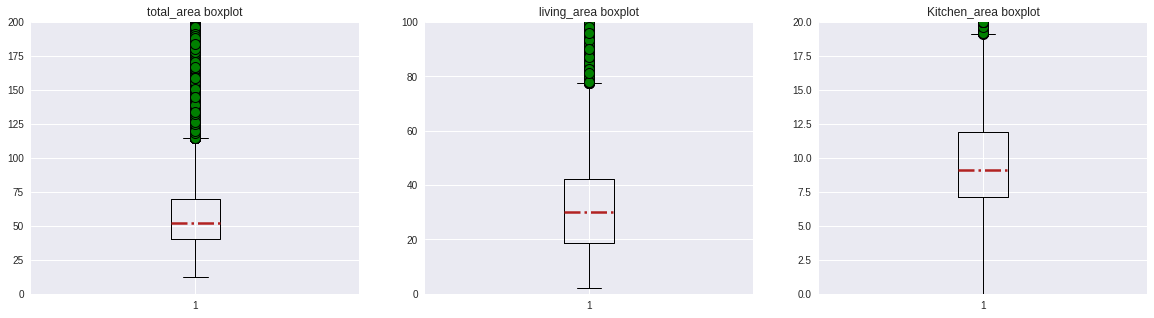

In [296]:
#Изучим следующие параметры объектов:общая площадь, жилая площадь, площадь кухни
display(data[['total_area','living_area','kitchen_area']].describe().round(2))
display(data[['total_area','living_area','kitchen_area']].mode())
#Построим диаграммы размаха
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 3, 1) 
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
flierprops = dict(marker='o', markerfacecolor='green', markersize=10,linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
ax1.boxplot(data['total_area'],flierprops=flierprops, medianprops=medianprops)
ax1.set_ylim(0,200); ax1.set_title('total_area boxplot')
ax2.boxplot(data['living_area'],flierprops=flierprops, medianprops=medianprops)
ax2.set_ylim(0,100);ax2.set_title('living_area boxplot')
ax3.boxplot(data['kitchen_area'],flierprops=flierprops, medianprops=medianprops)
ax3.set_ylim(0,20);ax3.set_title('Kitchen_area boxplot')
plt.subplots_adjust(hspace=0.3)

In [297]:
#напишем вспомогательную функцию для определения границ разброса значений
def get_swipe_range(dataset):
    
    median = pd.DataFrame.median(dataset)
    mean = pd.DataFrame.mean(dataset)
    min_value =  pd.DataFrame.min(dataset)
    max_value = pd.DataFrame.max(dataset)
    quartile_1 = pd.DataFrame(dataset).quantile(0.25,numeric_only=False)
    quartile_3 = pd.DataFrame(dataset).quantile(0.75,numeric_only=False)
    # Interquartile range
    iqr = round(quartile_3-quartile_1,2)
    #calculate lower border value (or left value)
    left_swipe_value = round(quartile_1-1.5*iqr,2)
    right_swipe_value = round(quartile_3+1.5*iqr,2)   
    
    print('Границы разброса значений для колонки:',dataset.name)
   # print('Min: %s' % min_value)
    #print('Mean: %s' % mean)
    #print('Max: %s' % max_value)
    #print('25% квартиль: %s' % quartile_1)
    #print('Median: %s' % median)
    #print('75% квартиль: %s' % quartile_3)
    #print('Interquartile range (IQR): %s' % iqr)        
    print('Левое значение: %s' % left_swipe_value.to_string())
    print('Правое значение: %s' % right_swipe_value.to_string())  
    
get_swipe_range(data['total_area'])
get_swipe_range(data['living_area'])
get_swipe_range(data['kitchen_area'])

Границы разброса значений для колонки: total_area
Левое значение: total_area   -4.82
Правое значение: total_area    114.7
Границы разброса значений для колонки: living_area
Левое значение: living_area   -16.47
Правое значение: living_area    77.56
Границы разброса значений для колонки: kitchen_area
Левое значение: kitchen_area   -0.1
Правое значение: kitchen_area    19.1


Text(0.5, 1.0, 'kitchen area histogram')

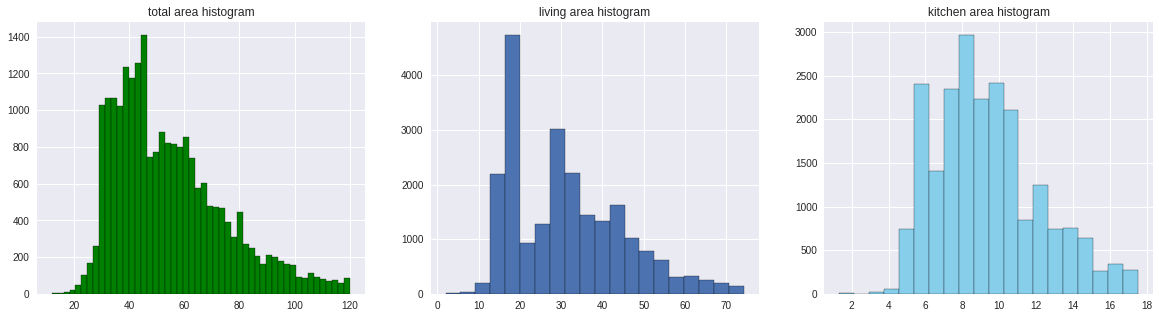

In [298]:
#Построим гистограммы с границами. Если левая граница меньше нуля, берем нулевое значение
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 3, 1) 
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.hist(data['total_area'],color='green',range=(12,120),bins=50, edgecolor='black')
ax1.set_title('total area histogram')
ax2.hist(data['living_area'],range=(2,74.25), ec='black',bins=20)
ax2.set_title('living area histogram')
ax3.hist(data['kitchen_area'],color='skyblue',range=(1.34,17.5), edgecolor='black',bins=20)
ax3.set_title('kitchen area histogram')

Из представленной информации я могу сделать следующие выводы:  
- в базе данных представлены квартиры на любой вкус с общей плолщадью от 12 до 900 кв. метров.    
- медианными значениями общей площади, жилой и кухонной площади являются значения 52, 30 и 10 соответственно.   
- наиболее распространенными квартирами являются квартиры с общей площадью 45 кв.м, жилой площадью 30кв.метров и кухней в 10,5  кв.метров. Наверно эти цифры соответствуют типовым планировкам, принятым при строительстве.  
- присутствует много выбросов в большую сторону по всем трем показателям. Это связано с тем, что в базе данных много объявлений о продажи дорогой недвижимости с очень большой площадью.

### Цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме.

,rooms,ceiling_height,floor,floors_total,last_price
count,23666.00,18157.00,23666.00,23666.00,23666.00
mean,2.07,2.73,5.88,10.68,6542.16
std,1.08,0.29,4.87,6.59,10893.55
min,0.00,1.00,1.00,1.00,12.19
25%,1.00,2.60,2.00,5.00,3400.00
50%,2.00,2.60,4.00,9.00,4650.00
75%,3.00,2.80,8.00,16.00,6800.00
max,19.00,14.00,33.00,60.00,763000.00


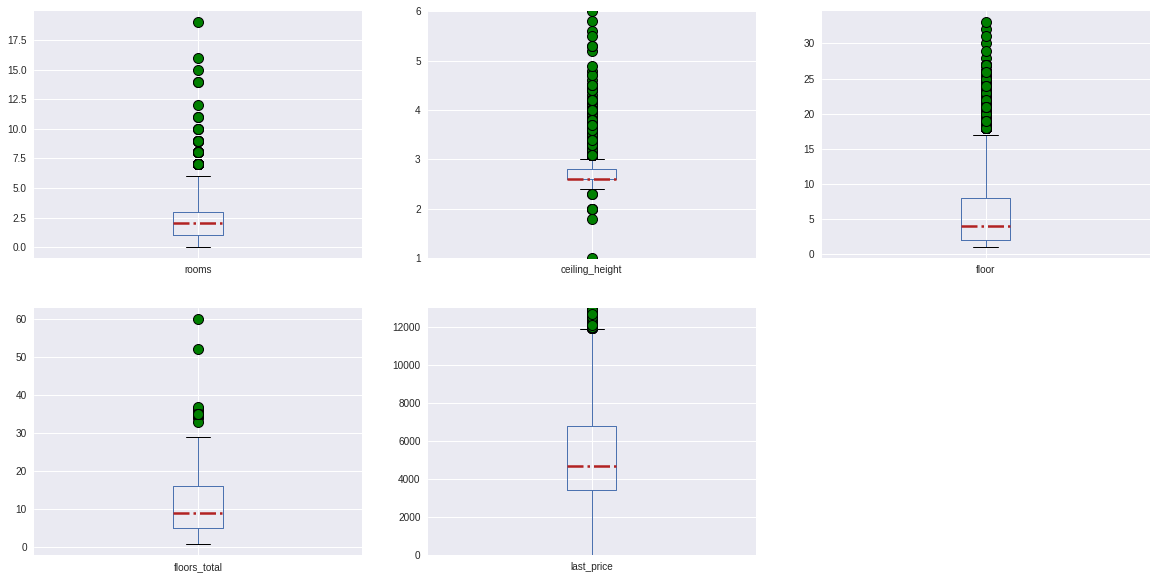

In [299]:
#Изучим статистику
display(data[['rooms','ceiling_height','floor','floors_total','last_price']].describe().round(2))
#Построим диаграммы размаха
fig,axes = plt.subplots(2,3,figsize=(20,10))
data.boxplot('rooms',ax=axes[0,0],grid=True, flierprops=flierprops, medianprops=medianprops)
data.boxplot('ceiling_height',ax=axes[0,1],flierprops=flierprops, medianprops=medianprops)
axes[0,1].set_ylim(1,6)
data.boxplot('floor',ax=axes[0,2],flierprops=flierprops, medianprops=medianprops)
data.boxplot('floors_total',ax=axes[1,0],flierprops=flierprops, medianprops=medianprops)
data.boxplot('last_price',ax=axes[1,1],flierprops=flierprops, medianprops=medianprops)
axes[1,1].set_ylim(0,13000)
fig.delaxes(axes[1][2])

In [300]:
get_swipe_range(data['rooms'])
get_swipe_range(data['ceiling_height'])
get_swipe_range(data['floor'])
get_swipe_range(data['floors_total'])
get_swipe_range(data['last_price'])

Границы разброса значений для колонки: rooms
Левое значение: rooms   -2.0
Правое значение: rooms    6.0
Границы разброса значений для колонки: ceiling_height
Левое значение: ceiling_height    2.3
Правое значение: ceiling_height    3.1
Границы разброса значений для колонки: floor
Левое значение: floor   -7.0
Правое значение: floor    17.0
Границы разброса значений для колонки: floors_total
Левое значение: floors_total   -11.5
Правое значение: floors_total    32.5
Границы разброса значений для колонки: last_price
Левое значение: last_price   -1700.0
Правое значение: last_price    11900.0


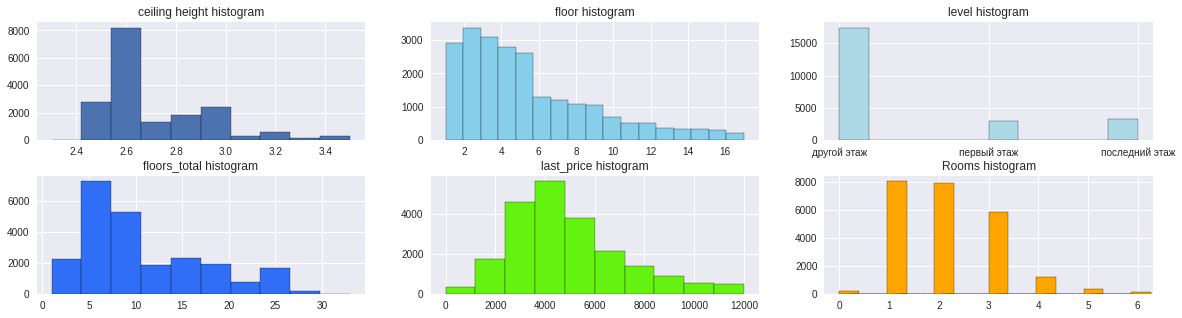

In [301]:
#Построим гистограммы 
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(2, 3, 1) 
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
ax1.hist(data['ceiling_height'],range=(2.3,3.5), edgecolor='black') 
ax1.set_title('ceiling height histogram')
ax2.hist(data['floor'],color='skyblue',range=(1,17), edgecolor='black',bins=17)
ax2.set_title('floor histogram')
ax3.hist(data['level'],width=0.2,color='lightblue',edgecolor='black')
ax3.set_title('level histogram')
ax4.hist(data['floors_total'],color='#306FF5',range=(1,33), edgecolor='black')
ax4.set_title('floors_total histogram')
ax5.hist(data['last_price'],color='#64F211', range=(0,12000), edgecolor='black')
ax5.set_title('last_price histogram')
ax6.hist(data['rooms'],color='orange', range=(0,6),width=0.4, edgecolor='black',bins='auto')
ax6.set_title('Rooms histogram')
plt.subplots_adjust(hspace=0.3)


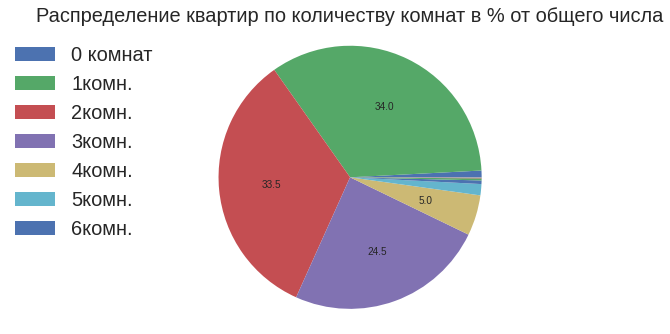

In [302]:
#Функция показывает значения на кусочках от 4%
def show_numbers(treshold):
    if treshold>4:
        return ('%.1f' % treshold) 
    else:
        return ''
# Создаю Series, в котором сохраю кол-во  квартир
rooms_group = data.pivot_table(index='rooms', values='last_price', aggfunc='count')
# Рисую круговую гистограмму
fig = rooms_group.plot(y='last_price', kind='pie',  title='Доля квартир по количеству комнат',
                      autopct = show_numbers,legend=True, radius=1.1, labeldistance=None)
fig.set_title('Распределение квартир по количеству комнат в % от общего числа')
fig.legend(['0 комнат','1комн.', '2комн.', '3комн.', '4комн.', '5комн.', '6комн.'],
           bbox_to_anchor=(-0.1,1), prop={'size':20})
fig.title.set_size(20)
fig.title.set_position([0.5,0.7])
fig.set_ylabel('')
plt.show()

Исходя из представленной информации, я могу сделать следующие выводы:
- во всех показателях есть выбросы, которые о основном связаны с наличием дорогих квартир с хорошими планировками, большим количеством комнат и большой ценой. Наличие фонда таких квартир ощутимо сдвигает значение среднего от медианы в верхнюю сторону.  
- самой высотной квартирой на пордажу является квартира на 33 этаже.  
- наиболее распространенной высотой потолков является 2.7 метра.  Также это значение является медианным значением.  
- больше всего квартир на продажу находится между первым и последним этажом, в основном на 2-6 этажах.  
- больше всего квартир на продажу расположены в зданиях от 5 до 10 этажей.
- наиболее распространены одно- и двухкомнатные квартиры, за ними идут 3х-комнатные квартиры.
- больше всего квартир имеют цену в районе 4-5 млн. рублей. 


### Расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка.

In [303]:
#Изучим статистику
display(data[['cityCenters_nearest','airports_nearest','parks_nearest','ponds_nearest']].describe().round(2))

,cityCenters_nearest,airports_nearest,parks_nearest,ponds_nearest
count,18157.00,18134.00,8074.00,9096.00
mean,14.18,28795.63,490.82,518.05
std,8.62,12631.65,342.37,277.81
min,0.00,0.00,1.00,13.00
25%,9.00,18582.00,288.00,293.75
50%,13.00,26729.00,455.00,503.00
75%,16.00,37274.50,612.00,729.25
max,66.00,84869.00,3190.00,1344.00


<AxesSubplot:>

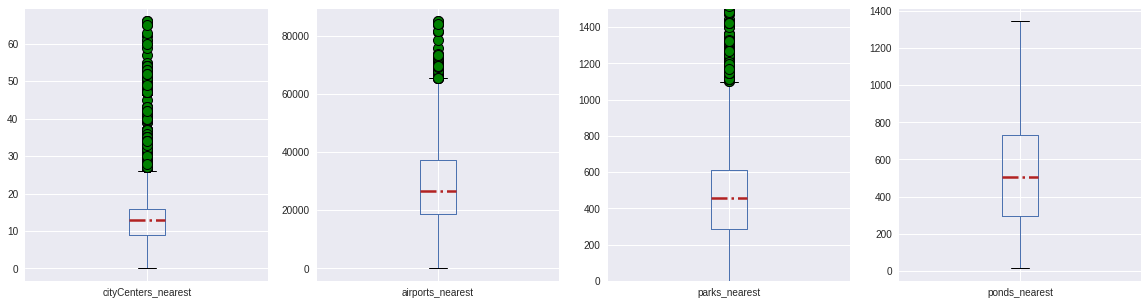

In [304]:
#Построим диаграммы размаха
fig,axes = plt.subplots(1,4,figsize=(20,5))
data.boxplot('cityCenters_nearest',ax=axes[0],grid=True, flierprops=flierprops, medianprops=medianprops)
data.boxplot('airports_nearest',ax=axes[1],flierprops=flierprops, medianprops=medianprops)
data.boxplot('parks_nearest',ax=axes[2],flierprops=flierprops, medianprops=medianprops)
axes[2].set_ylim(0,1500)
data.boxplot('ponds_nearest',ax=axes[3],flierprops=flierprops, medianprops=medianprops)



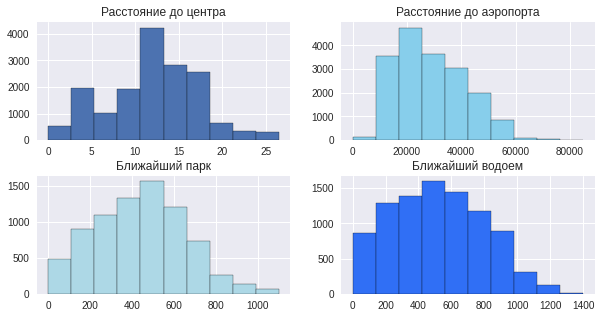

In [305]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.hist(data['cityCenters_nearest'],range=(0,26.5), edgecolor='black') 
ax1.set_title('Расстояние до центра')
ax2.hist(data['airports_nearest'],color='skyblue', edgecolor='black')
ax2.set_title('Расстояние до аэропорта')
ax3.hist(data['parks_nearest'], range = (0,1100), color='lightblue',edgecolor='black')
ax3.set_title('Ближайший парк')
ax4.hist(data['ponds_nearest'],range =(0,1400), color='#306FF5', edgecolor='black')
ax4.set_title('Ближайший водоем')
plt.subplots_adjust(hspace=0.3)

Оценивая показатели удаленности от центра, аэропорта, от ближайшего парка и водоема можно сделать следующие выводы:  
 - практически пятая часть всех квартир в базе данных продается в пределах Санкт-Петербурга, если считать, что его граница проходит в пределах 17 км от центра.  
 - такая же часть квартир находится в пределах 20 км от ближайшего аэропорта Санкт-Петербурга.
 - можно заметить, что гистограммы ближайшего парка и водоема практически одинаковы, что может говорить о том, что парк часто имеет и водную зону отдыха.  

### Изучение  day_of_first_exposition и month_of_first_exposition

Text(0.5, 1.0, 'Месяц выставления на продажу')

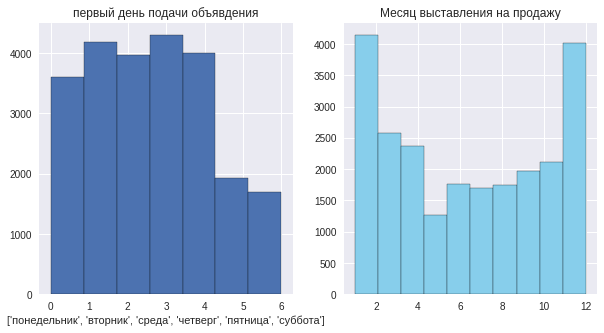

In [306]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(data['day_of_first_exposition'], edgecolor='black',bins=7) 
ax1.set_xlabel(['понедельник','вторник','среда','четверг','пятница','суббота'])
ax1.set_title('первый день подачи объявдения')
ax2.hist(data['month_of_first_exposition'] ,color='skyblue', edgecolor='black')
ax2.set_title('Месяц выставления на продажу')

Изучив диаграммы дня и месяца выставления квартир на продажу можно увидеть, что в основном они выставлялись в будние дни.    Любимыми месяцами граждан являются январь и декабрь. Это и неудивительно, так как начало и конец года являются частым временем принятия важных решений.

### Изучение days_exposition

count    20490.00
mean       180.94
std        219.82
min          1.00
25%         45.00
50%         95.00
75%        232.00
max       1580.00
Name: days_exposition, dtype: float64

Границы разброса значений для колонки: days_exposition
Левое значение: days_exposition   -235.5
Правое значение: days_exposition    512.5


<function matplotlib.pyplot.show(close=None, block=None)>

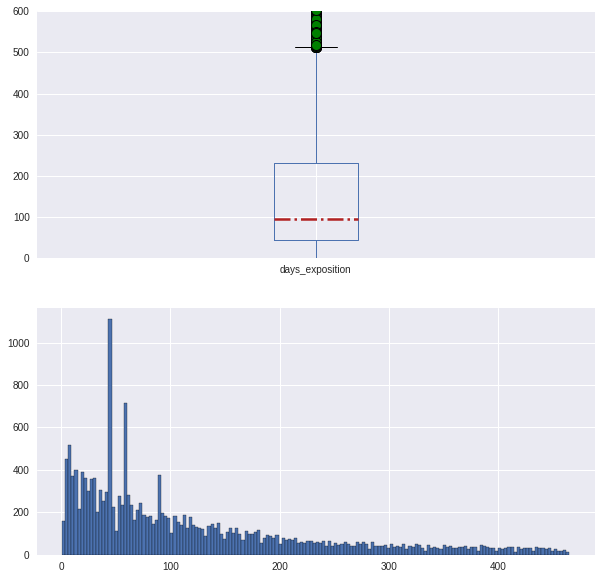

In [307]:
#Осмотр статистики
#display(data['days_exposition'].describe().round(2))
display(data[data['days_exposition']>0]['days_exposition'].describe().round(2))
df_tmp = data[data['days_exposition']>0] 
get_swipe_range(df_tmp['days_exposition'])
#Построение диаграммы размаха
fig,axes = plt.subplots(2,1,figsize=(10,10))
data.query('0<days_exposition').boxplot('days_exposition',ax=axes[0], grid=True, flierprops=flierprops, medianprops=medianprops)
axes[0].set_ylim(0,600)
#Отфильтруем значения в days-exposition от нулевых и меньше верхней границы выбросов
data.query('0<days_exposition<465')['days_exposition'].hist(ax=axes[1],range=(1,465),edgecolor='black',bins=164)
plt.show


#Гистограмма выше не может показать, что у нас нулевые значения отфильтрованы, только если не увеличить bins до запредельных уровней. Поэтому построим другой линейный график, где продолжительность продаж будет сгруппирована по количеству в зависимости от дня недели подачи объявления.

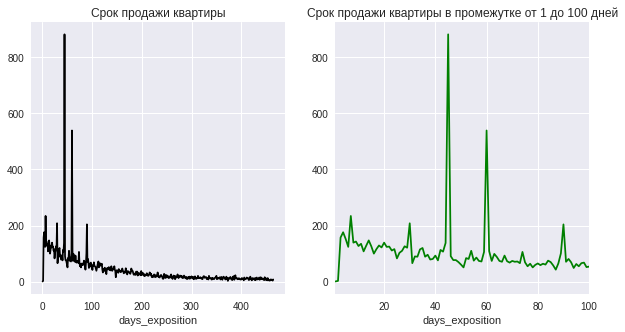

In [308]:
filtered_days = data.query('0<days_exposition<465')
fig,axes = plt.subplots(1,2,figsize=(10,5))
filtered_days.pivot_table(index='days_exposition',values='day_of_first_exposition',aggfunc='count').plot(
    style='k-', grid=True,ax=axes[0], title='Срок продажи квартиры', legend=False)
filtered_days.pivot_table(index='days_exposition',values='day_of_first_exposition',aggfunc='count').plot(
    style='g-', grid=True,ax=axes[1], title='Срок продажи квартиры в промежутке от 1 до 100 дней', legend=False)
axes[1].set_xlim(1,100)
plt.show()

На верхник графиках видно, даже не вызывая метод value_counts(), что значение в районе 90 дней занимает 5 позицию по убыванию. Поэтому можно считать, что квартира быстро продается, если период продажи меньше или равен 90 дням. А если больше, то квартира продается медленно.

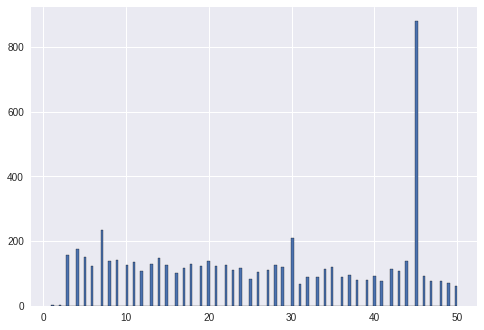

In [309]:
# код ревьюера
data.query('0<days_exposition<465')['days_exposition'].hist(range=(1,50),edgecolor='black',bins=164)
plt.show()

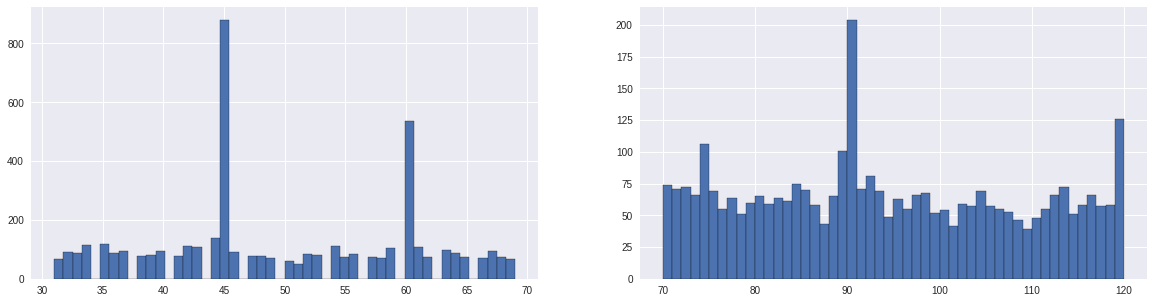

In [310]:
#На гистограмме можно заметить некое подобие убывающих ступенчатых всплесков продаж через примерно равные промежутки времени
#Построим более уточняющую гистограмму
fig,axes = plt.subplots(1,2,figsize=(20,5),sharey=False)
data.query('30<days_exposition<70')['days_exposition'].hist(ax=axes[0], edgecolor='black',bins=50)
#Из левого графика четко видно, что всплески идут на 45 и 60 день, те. с интервалом в 15 дней.
data.query('70<=days_exposition<=120')['days_exposition'].hist(ax=axes[1], edgecolor='black',bins=50)
plt.show()

Как мы видим из графиков и таблиц, среднее время продажи квартир составляет 157 дней, а медианное время продажи - 74 дня.   
Также, напомню, у нас присутствует большое количество нулевых значений, которые по нашей гипотезе означают , что квартира еще не продана. Также видно, что идут всплески продаж в дни, кратные 15 со дня подачи объявления. По моему мнению, это наверно связано с правилами работы на этой площадке. 

### Изучение факторов, влияющих на цену. 

Изучение, зависит ли цена от:  
общей площади;  
жилой площади;  
площади кухни;  
количества комнат;  
этажа, на котором расположена квартира (первый, последний, другой);  
даты размещения (день недели, месяц, год).

In [311]:
#Вызов таблички пропущенных значений после всех операций и общей информации
missing_values_tab(data)
display(data.info())

Ваш датафрейм содержит 31 колонок и 23666 строк.

Он имеет  9 колонок с пропущенными значениями.


,Пропущенные значения,% от всех значений,Тип данных
parks_nearest,15592,65.883546,float64
ponds_nearest,14570,61.565115,float64
airports_nearest,5532,23.375306,float64
ceiling_height,5509,23.278121,float64
cityCenters_nearest,5509,23.278121,float64
distance_cat,5509,23.278121,object
parks_around3000,5508,23.273895,Int64
ponds_around3000,5508,23.273895,Int64
avg_kitchen_coeff,195,0.823967,float64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23666 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23666 non-null  int64         
 1   last_price                 23666 non-null  float64       
 2   total_area                 23666 non-null  float64       
 3   first_day_exposition       23666 non-null  datetime64[ns]
 4   rooms                      23666 non-null  int64         
 5   ceiling_height             18157 non-null  float64       
 6   floors_total               23666 non-null  int64         
 7   living_area                23666 non-null  float64       
 8   floor                      23666 non-null  int64         
 9   is_apartment               23666 non-null  bool          
 10  studio                     23666 non-null  bool          
 11  open_plan                  23666 non-null  bool          
 12  kitc

None

In [312]:
#Cоздаем очищенный  датафрейм
get_swipe_range(data['total_area'])
get_swipe_range(data['living_area'])
get_swipe_range(data['kitchen_area'])
get_swipe_range(data['rooms'])
get_swipe_range(data['ceiling_height'])
get_swipe_range(data['floor'])
get_swipe_range(data['days_exposition'])
get_swipe_range(data['last_price'])


Границы разброса значений для колонки: total_area
Левое значение: total_area   -4.82
Правое значение: total_area    114.7
Границы разброса значений для колонки: living_area
Левое значение: living_area   -16.47
Правое значение: living_area    77.56
Границы разброса значений для колонки: kitchen_area
Левое значение: kitchen_area   -0.1
Правое значение: kitchen_area    19.1
Границы разброса значений для колонки: rooms
Левое значение: rooms   -2.0
Правое значение: rooms    6.0
Границы разброса значений для колонки: ceiling_height
Левое значение: ceiling_height    2.3
Правое значение: ceiling_height    3.1
Границы разброса значений для колонки: floor
Левое значение: floor   -7.0
Правое значение: floor    17.0
Границы разброса значений для колонки: days_exposition
Левое значение: days_exposition   -243.5
Правое значение: days_exposition    464.5
Границы разброса значений для колонки: last_price
Левое значение: last_price   -1700.0
Правое значение: last_price    11900.0


Очищенный датафрейм будет создаваться со следующими условиями:   
total_area<115  
rooms<=6    
last_price<=11900  

In [313]:
good_data = data.query(
    'total_area<115 and  rooms<=6 and  last_price<=11900')
# код ревьюера
print(good_data.shape[0] / data.shape[0])
(good_data.shape[0])

0.9066593425166906


21457

Коэффициент корелляции равен: 0.7


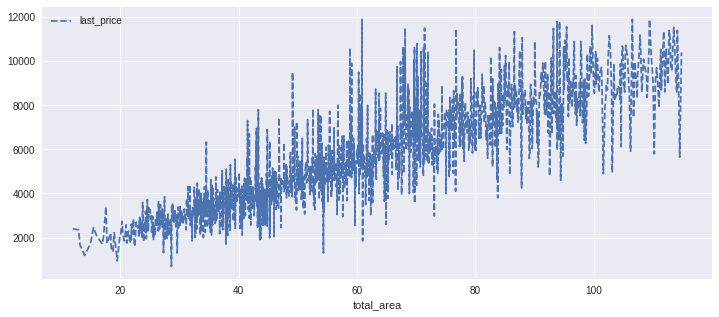

In [314]:
#Построим линейный график зависимости цены от общей площади
good_data.pivot_table(
    index='total_area',values='last_price').plot(linestyle='dashed',  grid=True, figsize=(12,5))
#Посчитаем коэффициент корелляции между
print('Коэффициент корелляции равен: {}'.format(good_data['last_price'].corr(good_data['total_area']).round(2)))

Невооруженным глазом можно заметить, что цена возрастает с увеличением общей площади. Наличие частых высоких пиков, где площадь больше или равна 100 метрам, говорит о том, что на цену таких квартир сильно начинают влиять и другие факторы, такие как престижность, удобство расположения, наличие вблизи парков или водоемов, какой тип дома или кол-во комнат.
Показатель коэффициента корелляции составляет 0.7, что говорит о высокой положительной зависимости цены от общей площади.

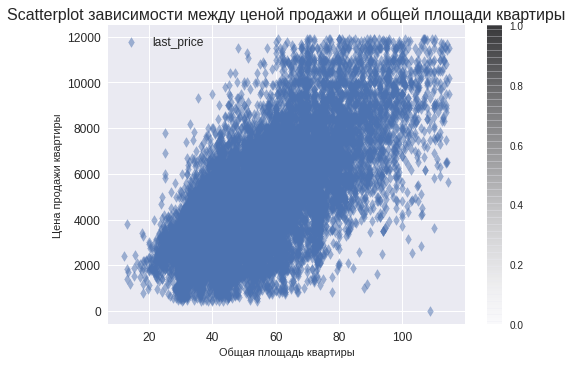

In [315]:
#Построение диаграммы рассеивания между показателями total_area и last_price
plt.style.use("seaborn")
plt.scatter(x='total_area', y='last_price',cmap="jet",alpha=0.5,marker="d",data=good_data)
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot зависимости между ценой продажи и общей площади квартиры", fontsize=16)
plt.legend(fontsize=12) 
plt.xlabel("Общая площадь квартиры")
plt.ylabel("Цена продажи квартиры")
plt.colorbar()
plt.show()   

Как можно заметить из диаграммы рассеивания, есть положительная корреляционная связь между этими двумя показателями.
Также с увеличением площади, облако становится все реже, а также более разросанным по высоте, что говорит о том, что количество продаж снижается, но разрос по цене становится все больше из-за усиления влияния других факторов.

Для изучения цены продажи от жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира,
даты размещения (день недели, месяц, год) мы попробуем построить график матрицы корреляции.

(8.0, 1.0)

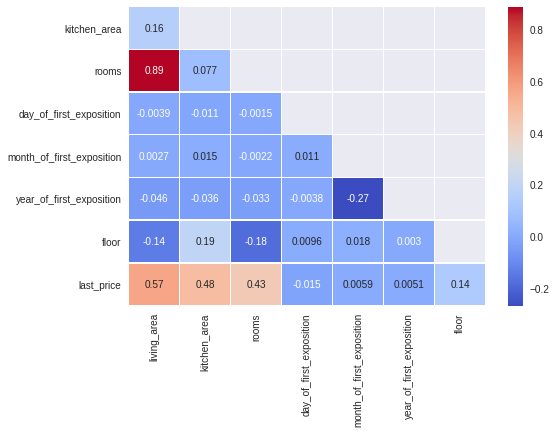

In [316]:
corr =  good_data[['living_area','kitchen_area','rooms','day_of_first_exposition',
           'month_of_first_exposition','year_of_first_exposition','floor','last_price']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, annot = True, fmt='.2g', cmap= 'coolwarm', linewidths=.5, mask=mask)
ax.set_xlim(0,7)
ax.set_ylim(8,1)

Для изучения цены продажи от жилой площади, площади кухни, количества комнат, этажа, на котором расположена  
квартира,даты размещения (день недели, месяц, год) я построю столбиковые диаграммы, где показатели будут сравнены с средней ценой:

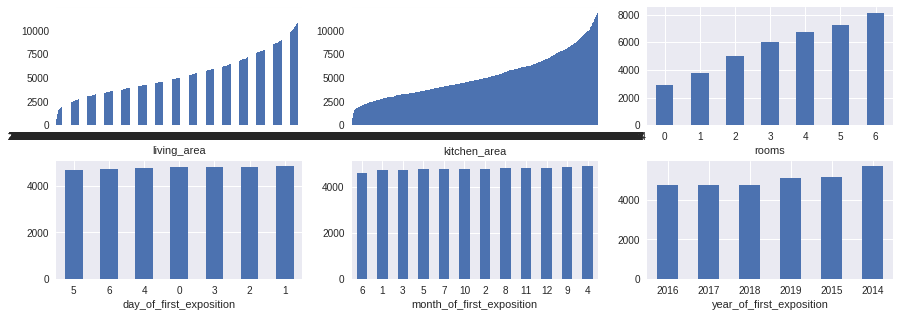

In [317]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2, 3, 1) 
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4) 
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
good_data.pivot_table(
    index='living_area',values='last_price').sort_values(by='last_price').plot(
    kind='bar',ax=ax1,  grid=True, rot=0,legend=False)
good_data.pivot_table(
    index='kitchen_area',values='last_price').sort_values(by='last_price').plot(
    kind='bar',ax=ax2,  grid=True, rot=0,legend=False)
good_data.pivot_table(
    index='rooms',values='last_price').sort_values(by='last_price').plot(
    kind='bar',ax=ax3,  grid=True, rot=0, legend=False)
good_data.pivot_table(
    index='day_of_first_exposition',values='last_price').sort_values(by='last_price').plot(
    kind='bar',ax=ax4,  grid=True, rot=0,legend=False)
good_data.pivot_table(
    index='month_of_first_exposition',values='last_price').sort_values(by='last_price').plot(
    kind='bar',ax=ax5,  grid=True, rot=0,legend=False)
good_data.pivot_table(
    index='year_of_first_exposition',values='last_price').sort_values(by='last_price').plot(
    kind='bar',ax=ax6,  grid=True, rot=0,legend=False)
plt.subplots_adjust(hspace=0.3)
plt.show()

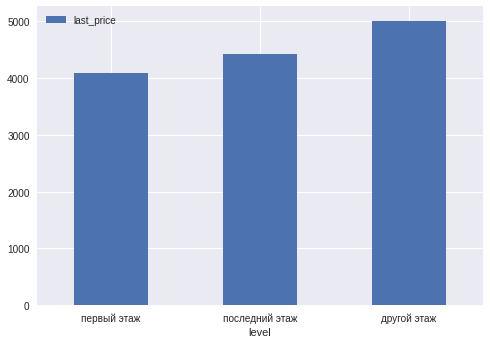

In [318]:
#Построим диаграмму зависимости цены от категории этажа
good_data.pivot_table(
    index='level',values='last_price').sort_values(by='last_price').plot(kind='bar',  grid=True, rot=0)
plt.show()

Из представленной информации я могу заключить, что:
- из представленных показателей наиболее сильно влияет на цену жилая площадь, она имеет коэффициент положительный корреляции 0.57, что соответствует средней взаимозависимости. 
- площадь кухни и количество комнат также чуть-чуть не дотягивают до значений средней положительной корреляции.
- другие показатели слабо или почти не коррелируют с ценой.  
- что касается зависимости категории этажа и цены, то из столбчатого графика видно, что цена возрастает с удалением квартиры от земной поверхности, но средняя цена квартир на последнем этаже все-таки ниже, чем квартир на промежуточных этажах.

### Расчет средней цены квадратного метра 

In [319]:
#Выведем список 10 населенных пунктов с наибольшим количеством объявлений
prices_region = good_data.query('locality_name!="неизвестно"').pivot_table(
    index='locality_name',values='price_for_1m',aggfunc=['count','mean']).sort_values(
    by=('count','price_for_1m'),ascending=False)
#Удалим мульти-индексы
prices_region = prices_region.droplevel(level=1,axis=1)
prices_region.index.names = ['Населенный пункт']
#Переименуем колонки
prices_region = prices_region.rename(columns ={'count':'Число объявлений','mean':'Средняя цена за метр в тысячах'})
display(prices_region.head(10))
#Выведем строки с максимальным и минимальным значением средней цены
display(
    prices_region[(prices_region['Средняя цена за метр в тысячах'] ==prices_region['Средняя цена за метр в тысячах'].max()) |
                 (prices_region['Средняя цена за метр в тысячах'] ==prices_region['Средняя цена за метр в тысячах'].min())
                 ])
#Проверка
good_data[good_data['locality_name'].str.contains('Лисий')]

,Число объявлений,Средняя цена за метр в тысячах
Населенный пункт,,
Санкт-Петербург,13634,105.739996
посёлок Мурино,520,85.675192
посёлок Шушары,436,78.578670
Всеволожск,394,67.223096
Пушкин,337,100.494659
Колпино,335,75.221493
посёлок Парголово,326,90.332515
Гатчина,303,68.663696
деревня Кудрово,298,92.410738


,Число объявлений,Средняя цена за метр в тысячах
Населенный пункт,,
деревня Старополье,3,11.2
посёлок Лисий Нос,2,121.6


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,distance_cat,avg_kitchen_coeff,avg_living_coeff,clean_name,price_for_1m,day_of_first_exposition,month_of_first_exposition,year_of_first_exposition,level
6361,4,2350.0,40.0,2017-02-08,2,2.7,2,28.00000,1,False,...,119,за КАДом,0.174163,0.579287,Лисий Нос,58.8,2,2,2017,первый этаж
12047,8,2750.0,36.9,2015-05-13,1,3.0,2,19.00000,2,False,...,1375,за КАДом,0.249906,0.485989,Лисий Нос,74.5,2,5,2015,последний этаж
21934,3,7305.0,43.3,2018-10-09,1,2.6,10,21.04332,10,False,...,60,за КАДом,0.249906,0.485989,Лисий Нос,168.7,1,10,2018,последний этаж


Как видно из вышеприведенной таблицы, городом с наибольшим числом объявлений (13634) и наибольшей средней ценой квадратного метра(105,7тр) является Санкт-Петербург.  
Наименьшая средняя цена кв. метра из этого списка в населенном пункте Выборг (58тр) и 228 объявлений. 
Населенным пунктом с наибольшей максимальной средней ценой за кв. метр (121.6тр) оказался поселок Лисий Нос, а минимальной ценой - деревня Старополье (11.2тр).

Максимальное значение средней цены за кв.метр в зависимости от расстояния до центра города равно:
 price_for_1m    122.77203


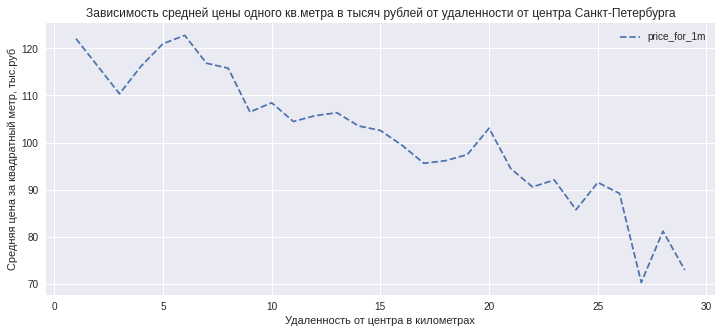

In [320]:
#нарисуем линейный график и исключим нулевые значения cityCenters_nearest
good_data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest!=0').pivot_table(index='cityCenters_nearest',
                                                                                           values='price_for_1m').plot(
    linestyle='dashed',  grid=True, figsize=(12,5),
    ylabel = 'Средняя цена за квадратный метр, тыс.руб',
    xlabel = 'Удаленность от центра в километрах',
    title = 'Зависимость средней цены одного кв.метра в тысяч рублей от удаленности от центра Санкт-Петербурга')
print('Максимальное значение средней цены за кв.метр в зависимости от расстояния до центра города равно:\n',
good_data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest!=0').pivot_table(
    index='cityCenters_nearest',values='price_for_1m').max().to_string())

In [321]:
#Расчет коэффициента корреляции между удаленностью от центра Санкт-Петербурга и ценой
print('Коэффициент корреляции Пирсона равен: ', 
      good_data.query('locality_name=="Санкт-Петербург" and cityCenters_nearest!=0')['last_price'].corr(good_data['cityCenters_nearest']).round(2))

Коэффициент корреляции Пирсона равен:  -0.35


Исходя из представленной информации видно, что максимальная средняя стоимость квадратного метра в Санкт-Петербурге почти равна 122,7тр за м2.
И она постепенно убывает с удалением от центра города. Но коэффициент корреляции равен -0.35, то есть говорит о слабой отрицательной зависимости. Это связано с тем, что очень много квартир продается в зоне удаленности от 9 до 16 км.

## Вывод

В результате анализа сервиса Яндекс.Недвижимость можно сделать следующие выводы:  
- всего в базе данных, очищенной от искажений, находится 21457 объявлений, из них на Санкт-Петербург приходится 13634.  
- больше всего на цену квартир  влияют такие характеристики как: общая площадь, жилая и кухонная площадь, количество комнат. 
- медианной ценой продажи является 4,65 млн рублей.
- наиболее распространены одно- и двухкомнатные квартиры, количества, которых почти равны и составляют около 8тыс.  
- средняя общая площадь квартир составляет 60 квадратных метров, медианная - 52кв.метра.
- средняя жилая площадь составляет 34 кв. метра, медианная - 30кв.метров.
- средняя площадь кухни равна 10.5 метра, медианная -9.1 кв. метра.
- средняя высота потолков квартир составляет 2.7 метра, медианная - 2.6м.
- большинство квартир расположены между 1 и последним этажом, в основном между 2-6 этажами.
- чаще всего встречаются квартиры, расположенные в зданиях 5-10 этажей.
- средняя удаленность от центра составляет 15 км.
- Как мы видим из графиков и таблиц, среднее время продажи квартир составляет 157 дней, а медианное время продажи - 74 дня.  
- продажи, которые заняли меньше 90 дней, можно считать быстрыми, а которые больше - медленными.
- средняя цена за квадратный метр в Санкт-петербурге слабо отрицательно коррелирует с расстоянием до центра города. Ее максимум составляет 122,7 тыс рублей на расстоянии 6км от центра.
